# P1 Picky Eater



* The maximum likelihood solution to this problem is simple. You just count all the food items per each category first, i.e, 106, 23, and 50, and then divide them by the total count 179 as follows:
$p_\text{blueberry}=\frac{106}{179}, p_\text{strawberry}=\frac{23}{179}, \text{and } p_\text{yogurt}=\frac{50}{179}$.
* An intuitive and simple solution to the MAP version
  * As for the MAP solution, we need to incorporate the parents' a prior knowledge about the kid's eating behavior. It is represented in the form of earlier counts that they have accumulated before the daycare started, i.e., 1080, 450, and 900.
  * You can think these counts as some sort of the parents' belief about the categorical distribution. For example, if they watched the kid's behavior only for three days and the count was 108, 45, and 90. If you compare these numbers to the month-long obeservation, their ratio is indeed the same. However, since they have observed for a longer time, their belief might be stronger with more observation.
  * Pseudocounts reflect this prior knowledge. If these $\alpha$ values are larger, the initial belief is stronger, influencing more to the MAP solution, than the new observation made in the daycare does.
  * An intuitive way to harmonize the new data from the daycare and the pseudocounts is to sum them up. Then, for example, the number of blueberries the kid ate, in total, is $106+1080=1,186$. This number needs to be divided by the total number of food items, which adds up all the counts and pseudocounts, i.e., $106+1080+23+450+50+900=2609$. Hence, the intuitive MAP estimate for the probability of eating blueberry is $p_\text{blueberry}=\frac{1,186}{2,609}$.
  * Ditto for the other food categories.
* As for the more rigorous MAP solution,
  * We can rewrite the posterior probability shown in L01-S13 for our specific case.
\begin{align}
P(\mathbf{X}|\mathbf{\Theta})&=P(X_\text{blueberry}=106, X_\text{strawberry}=23, X_\text{yogurt}=50\big|\\
&\Theta_\text{blueberry}=\frac{1080}{2430}, \Theta_\text{strawberry}=\frac{450}{2430}, \Theta_\text{yogurt}=\frac{900}{2430})\\
&\cdot P(\Theta_\text{blueberry}=\frac{1080}{2430}, \Theta_\text{strawberry}=\frac{450}{2430}, \Theta_\text{yogurt}=\frac{900}{2430})\\
&\propto \prod_{k=1}^K p_k^{x_k+\alpha_k-1}\\
&=p_\text{blueberry}^{x_\text{blueberry}+\alpha_\text{blueberry}-1}\cdot
p_\text{strawberry}^{x_\text{strawberry}+\alpha_\text{strawberry}-1}\cdot
p_\text{yogurt}^{x_\text{yogurt}+\alpha_\text{yogurt}-1}\\
&=p_\text{blueberry}^{106+1080-1}\cdot
p_\text{strawberry}^{23+450-1}\cdot
p_\text{yogurt}^{50+900-1}
\end{align}
  * By taking the logarithm, the log of posterior probability becomes
\begin{equation}
\ln P(\mathbf{X}|\mathbf{\Theta}) = (106+1080-1)\ln p_\text{blueberry} +
(23+450-1)\ln p_\text{strawberry} +
(50+900-1)\ln p_\text{yogurt} + \text{constant}
\end{equation}
  * Hence, the maximum a posteriori (MAP) solution is to maximize this log of posterior probability as well as the additional Lagrange multiplier term (L03-S21)
\begin{align}
\text{argmax}_{\lambda, p_\text{blueberry}, p_\text{strawberry}, p_\text{yogurt}} \ln P(\mathbf{X}|\mathbf{\Theta}) &= 1,185\ln p_\text{blueberry} +
472\ln p_\text{strawberry} +
949\ln p_\text{yogurt}\\
&+ \lambda(p_\text{blueberry}+p_\text{strawberry}+p_\text{yogurt}-1)
\end{align}
  * Finally, after doing the constrained optimization as shown in L03-S21,    
\begin{align}
p_\text{blueberry}=\frac{1,185}{1,185+472+949}, \quad p_\text{strawberry}=\frac{472}{1,185+472+949}, \quad p_\text{yogurt}=\frac{949}{1,185+472+949}
\end{align}
  * Note: you will see that the intuitive version is very similar to this rigorous version except for the additional $-1$ applied to the pseudocounts.

# P2 Central Limit Theorem


In [ ]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import IPython

s, rate = sf.read('s.wav')
x1, rate = sf.read('x1.wav')
x2, rate = sf.read('x2.wav')


IPython.display.Audio(s, rate=rate)


In [ ]:
IPython.display.Audio(x1, rate=rate)

In [ ]:
IPython.display.Audio(x2, rate=rate)

In [ ]:
# Standardize the signals
s -= np.mean(s)
s /= np.std(s)
x1 -= np.mean(x1)
x1 /= np.std(x1)
x2 -= np.mean(x2)
x2 /= np.std(x2)

In [ ]:
# Compute Kertosis of the signals
kertosis_s = np.mean(s**4)-3
kertosis_x1 = np.mean(x1**4)-3
kertosis_x2 = np.mean(x2**4)-3
print(kertosis_s, kertosis_x1, kertosis_x2)

0.0002532090211995613 0.00013225008459176894 0.00012012225336815209


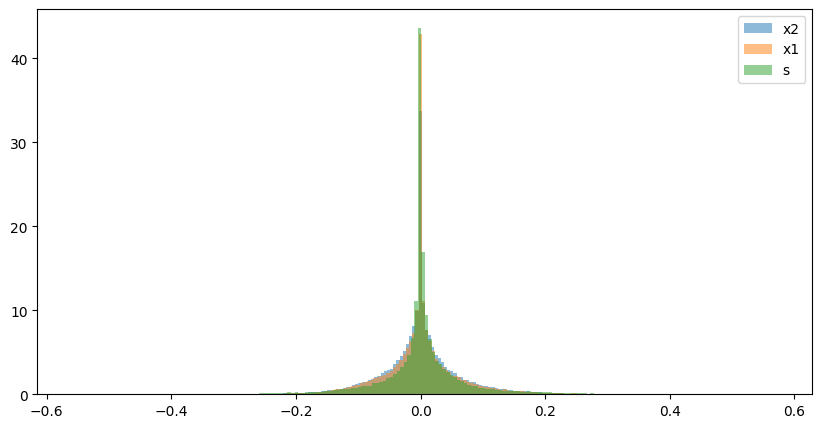

In [ ]:
# Draw histogram
plt.figure(figsize=(10, 5))
plt.hist(x2, bins=200, density=True, alpha=0.5)
plt.hist(x1, bins=200, density=True, alpha=0.5)
plt.hist(s, bins=200, density=True, alpha=0.5)
plt.legend(['x2', 'x1', 's'])
plt.show()


The differences are subtle, but you will see that x2's kertosis value is the lowest, and its distribution is less sharp than x1 or s.

# P3 Power Iteration

In [ ]:


import numpy as np
import matplotlib.pyplot as plt

# The power iteration function I wrote

def power_iter(C, K):
    N = C.shape[1]
    V = np.random.rand(N, K)
    V = V / np.sqrt(np.sum(V ** 2, axis=0))
    L = np.zeros(K)
    max_iter = 1000
    threshold = 1e-10

    for kk in range(K):
        for ii in range(max_iter):
            pV = V[:, kk].copy()
            V[:, kk] = C@V[:, kk]
            V[:, kk] = V[:, kk] / np.sqrt(np.sum(V[:, kk] ** 2))
            dv = pV - V[:, kk]
            if np.sqrt(np.sum(dv ** 2)) < threshold:
                L[kk] = np.dot(V[:, kk].T, np.dot(C, V[:, kk]))
                C = C - np.outer(V[:, kk], L[kk] * V[:, kk])
                print('K={}: The algorithm converged at it={}.'.format(kk, ii))
                break
            if ii == max_iter - 1:
                print('K={}: The algorithm did not converge.'.format(kk))
    return V, L


In [ ]:
# Load the data file and check on its size
X=np.load('flute.npy')
print(X.shape)

(128, 143)


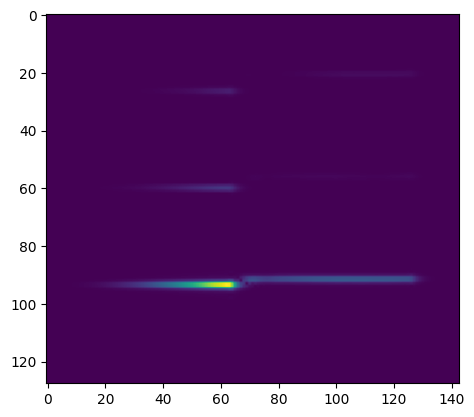

In [ ]:
# Let's see how it looks like
plt.imshow(X)

(128, 128)


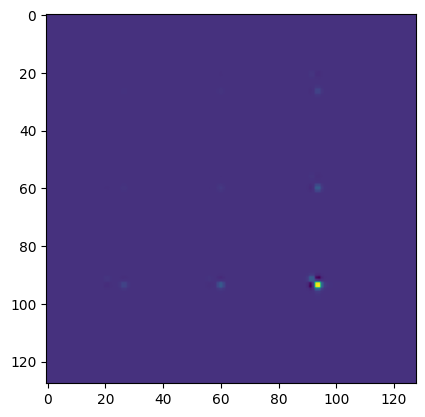

In [ ]:
# Compute the covariance matrix
# 1. Center the spectra by subtracting the mean spectrum
X_centered = X - np.mean(X, axis=1, keepdims=True)
# 2. Compute the covariance matrix
C = np.cov(X_centered)
print(C.shape) # make sure the shape of the covariance matrix is [# features] x [# features] not [# samples] x [# samples]
plt.imshow(C)

In [ ]:
# Now, let's see if the hand-made power iteration code works
V, L = power_iter(C, 2)
print(L)

K=0: The algorithm converged at it=13.
K=1: The algorithm converged at it=5.
[942.6658058  149.99059444]


(-0.5, 142.5, 1.5, -0.5)

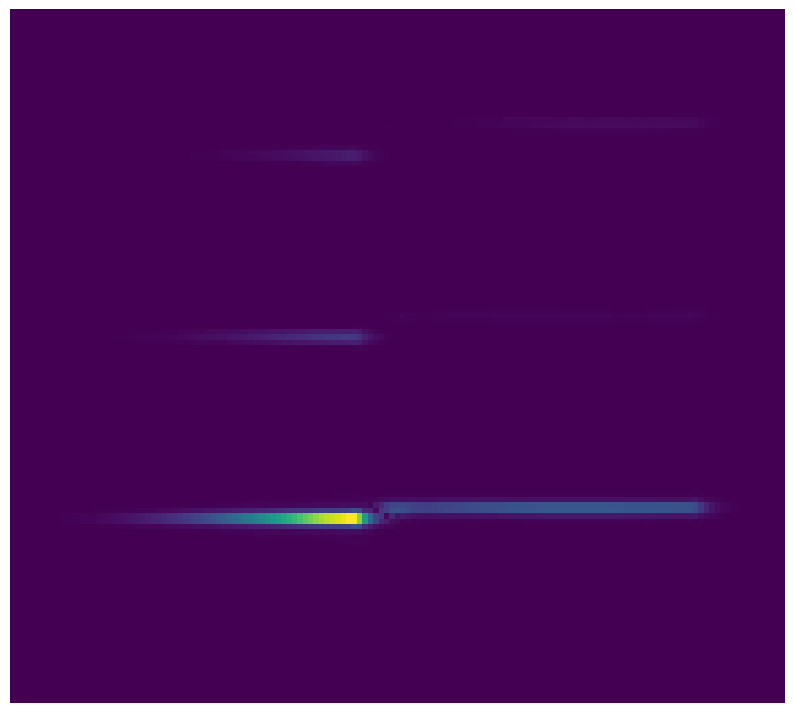

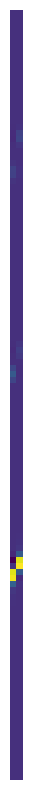

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(X) # Input spectrogram
plt.axis('off')
plt.figure(figsize=(2,10))
plt.imshow(V) # Learned eigenvectors
plt.axis('off')
plt.figure(figsize=(10,2))
plt.imshow(V.T@X) # The temporal activation vectors
plt.axis('off')

In [ ]:
# We can recover the input by multiplying the eigenvectors and their corresponding temporal activations.
X_recons1=V@(V.T@X)
# Is it doing good reconstruction? The sum of squared error:
print(np.sum((X-X_recons1)**2))

295.8355839954919


(143, 143)
K=0: The algorithm converged at it=16.
K=1: The algorithm converged at it=4.
[1429.37369033  339.89431862]


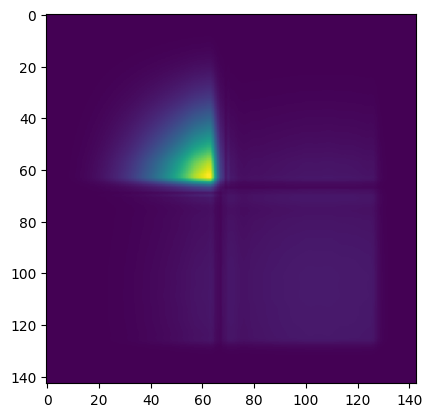

In [ ]:
# This time, let's solve the problem in a transposed way.

# 1. The mean over the row vectors (temporal activations)
X_centered = X - np.mean(X, axis=0, keepdims=True)
# 2. Compute the covariance matrix, by seeing time frames as features
C = np.cov(X_centered.T)
print(C.shape) # make sure the shape of the covariance matrix is [# samples] x [# samples] not [# features] x [# features]
plt.imshow(C)

V, L = power_iter(C, 2)
print(L)

(-0.5, 1.5, 127.5, -0.5)

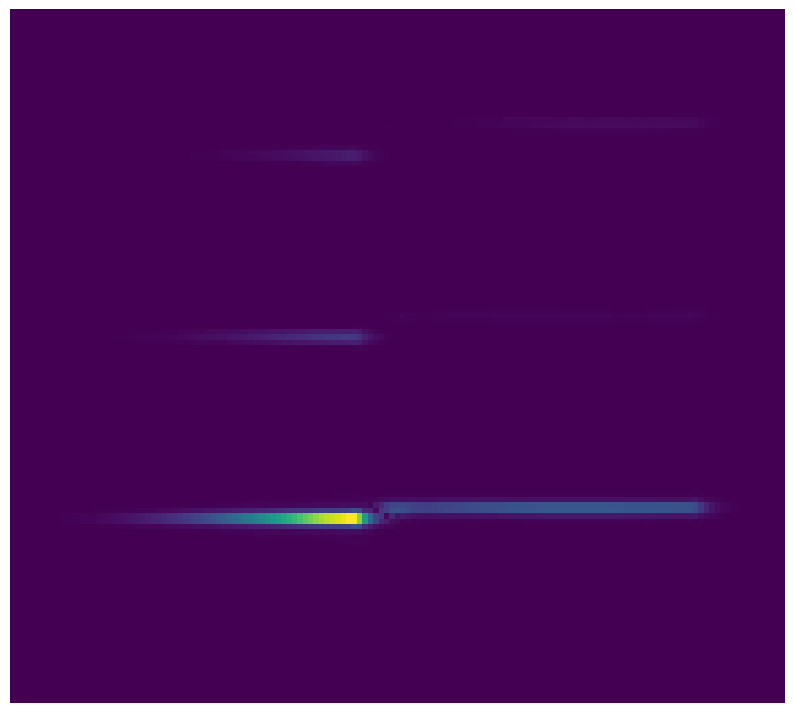

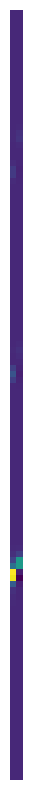

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(X)
plt.axis('off')
plt.figure(figsize=(10,2))
plt.imshow(V.T)
plt.axis('off')
plt.figure(figsize=(2,10))
plt.imshow(X@V)
plt.axis('off')

In [ ]:
# Let's do reconstruction in the transposed way and check on the sum of squared error.
X_recons2=(X@V)@V.T
print(np.sum((X-X_recons2)**2))

279.5538112935449


## P4 De-beeper

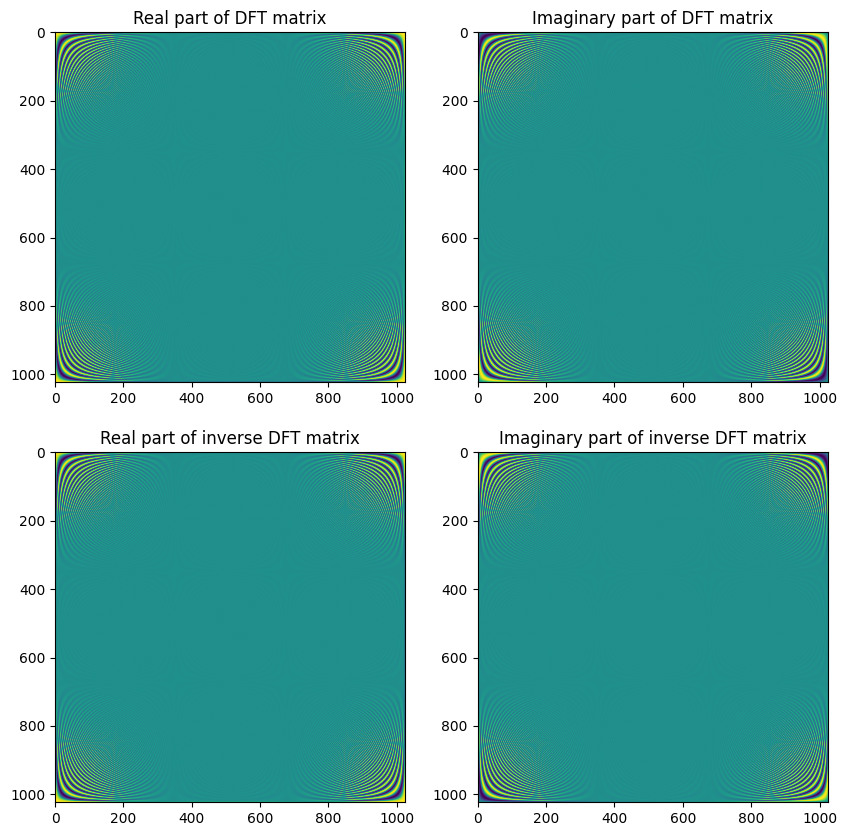

In [ ]:
import numpy as np
import soundfile as sf
import IPython
import matplotlib.pyplot as plt


# This is my function that computes the DFT and inverse DFT basis vectors
def genDFTkernel(N):
    f = np.arange(N).reshape((N, 1))
    n = np.arange(1, N + 1).reshape((1,N))
    D = np.exp(-1j * (2 * np.pi * f * n) / N)
    iD = np.exp(1j * (2 * np.pi * np.transpose(n) * np.transpose(f)) / N) / N
    return D, iD



# Visualize the DFT and inverse DFT matrices
N = 1024
hp = 512

D, iD = genDFTkernel(N)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(np.real(D))
plt.title('Real part of DFT matrix')
plt.subplot(222)
plt.imshow(np.imag(D))
plt.title('Imaginary part of DFT matrix')
plt.subplot(223)
plt.imshow(np.real(iD))
plt.title('Real part of inverse DFT matrix')
plt.subplot(224)
plt.imshow(np.imag(iD))
plt.title('Imaginary part of inverse DFT matrix')
plt.show()

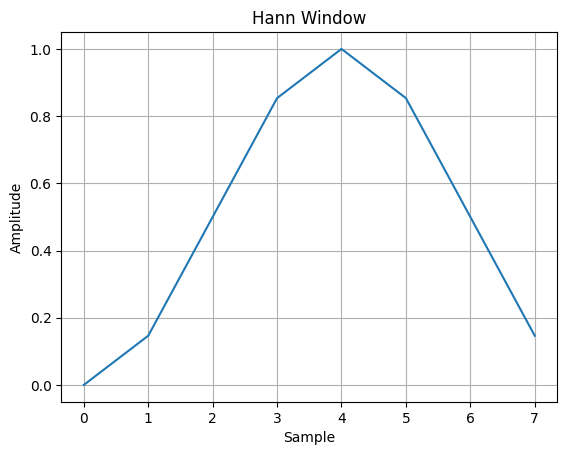

In [ ]:
# It generates a Hann window of size N. The periodic version makes sure the sum-to-one condition
def hann_window(N, periodic=True):

    if periodic:
        N = N + 1
    n = np.arange(N)
    window = 0.5 * (1 - np.cos(2 * np.pi * n / (N - 1)))
    if periodic:
        window = window[:-1]
    return window

# Let's visualize it by drawing a very small window
window = hann_window(8, periodic=True)

# Plot the Hann window
plt.plot(window)
plt.title('Hann Window')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [ ]:
# Read the input noisy speech signal (with a beep)
x, rate=sf.read('x.wav')

# Check out its sound.
IPython.display.Audio(x, rate=rate)


(63488,)


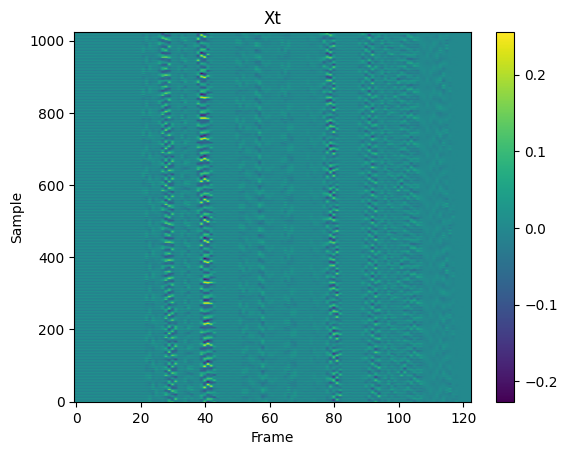

In [ ]:
# Length of the signal
L = len(x)

# Create a placeholder matrix
Xt = np.zeros((N, int(np.ceil((L - hp) / hp))))

# Create a zero-padded version of x
x_zero = np.zeros(int(np.ceil((L - hp) / hp) * hp + hp))
print(x_zero.shape)
x_zero[:L] = x

# Fill Xt with segments of x
for ii in range(Xt.shape[1]):
    Xt[:, ii] = x_zero[(ii * hp):(ii * hp + N)]

# Visualize Xt
plt.figure()
plt.imshow(Xt, aspect='auto', origin='lower')
plt.title('Xt')
plt.xlabel('Frame')
plt.ylabel('Sample')
plt.colorbar()
plt.show()

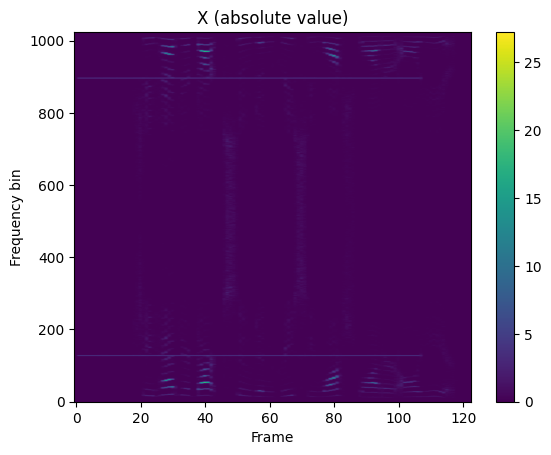

In [ ]:
# Compute the STFT

# Generate a Hann window
wn = hann_window(N)

# Apply the DFT matrix to the input matrix
X = D @ (Xt[:, 1:-1] * wn[:, np.newaxis])
X = np.hstack([
    np.hstack([Xt[:N//2, 0], Xt[N//2:, 0] * wn[N//2:]]).reshape(-1, 1),
    X,
    np.hstack([Xt[:N//2, -1] * wn[:N//2], Xt[N//2:, -1]]).reshape(-1, 1)
])

# Visualize the absolute value of X.
# We can see the beep but its exact index is hard to tell.
plt.figure()
plt.imshow(np.abs(X), aspect='auto', origin='lower')
plt.title('X (absolute value)')
plt.xlabel('Frame')
plt.ylabel('Frequency bin')
plt.colorbar()
plt.show()


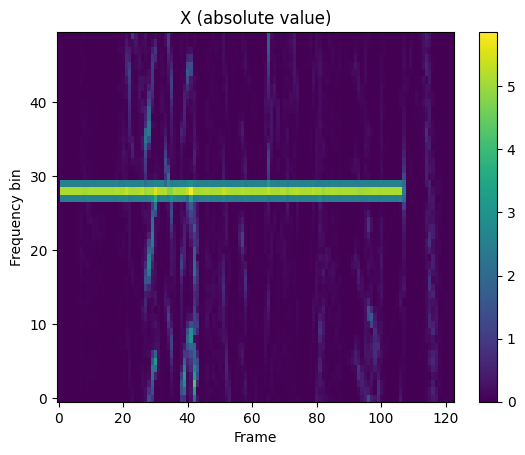

In [ ]:

# Magnify the region to correctly identify the exact frequency to suppress
plt.figure()
plt.imshow(np.abs(X[100:150, :]), aspect='auto', origin='lower')
plt.title('X (absolute value)')
plt.xlabel('Frame')
plt.ylabel('Frequency bin')
plt.colorbar()
plt.show()



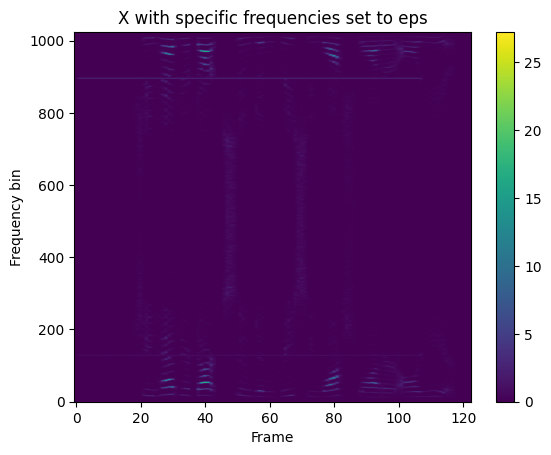

In [ ]:

# Set specific frequency bins to a very small value (close to zero)
indices_to_set = [126, 1023-126] # The beep frequencies
for offset in [0, 1, 2]:
    X[indices_to_set[0] + offset, :] = np.finfo(float).eps
    X[indices_to_set[1] + offset, :] = np.finfo(float).eps

# Visualize the modified X
plt.figure()
plt.imshow(np.abs(X), aspect='auto', origin='lower')
plt.title('X with specific frequencies set to eps')
plt.xlabel('Frame')
plt.ylabel('Frequency bin')
plt.colorbar()
plt.show()

# Inverse transform to get the modified signal segments
Xtr = np.real(iD @ X)
xr = np.zeros(int(np.ceil((L - hp) / hp) * hp + hp))

# Reconstruct the signal from modified segments
for ii in range(Xtr.shape[1]):
    xr[ii * hp:ii * hp + N] += Xtr[:, ii]



In [ ]:
IPython.display.Audio(xr, rate=rate)